<a href="https://colab.research.google.com/github/JmiguelBM/dataset/blob/main/VHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install session_info

In [18]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [19]:
VHC = pd.read_excel('/content/HepatitisCdata.xlsx')
VHC

,patient number,Category,Donor Blood,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
VHC.value_counts()

In [ ]:
VHC.isna().sum()

In [23]:
VHC = VHC.dropna()

In [ ]:
VHC.isna().sum()

In [45]:
Hepatitis = len(VHC[VHC['Donor Blood'] == 'H'])
Fibrosis = len(VHC[VHC['Donor Blood'] == 'F'])
Cirrhosis = len(VHC[VHC['Donor Blood'] == 'C'])

In [46]:
suspect_Blood_Donor = len(VHC[VHC['Donor Blood'] == 'SB'])
Blood_Donor = len(VHC[VHC['Donor Blood'] == 'BD'])

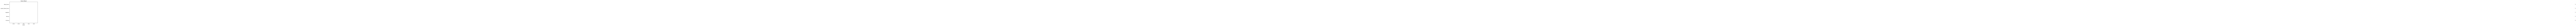

In [47]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Blood_Donor', 'suspect_Blood_Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis')
y_pos = np.arange(len(y))
x = (Blood_Donor, suspect_Blood_Donor, Hepatitis, Fibrosis, Cirrhosis )
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Donor Blood')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [49]:
qualitative = []
quantitative = []
for feature in VHC.columns:
    if len(VHC[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [50]:
qualitative

['Category', 'Donor Blood']

In [51]:

quantitative

['patient number',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [52]:
VHC['Donor Blood'] = VHC['Donor Blood'].map({'BD': 0, 'SB': 1, 'H': 2,'F': 3,'C': 4,})

In [53]:
VHC

,patient number,Category,Donor Blood,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,NaN,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,NaN,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,NaN,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,NaN,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,NaN,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3,NaN,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3,NaN,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3,NaN,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,NaN,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


<ipython-input-54-0d07bd247535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = VHC.corr()


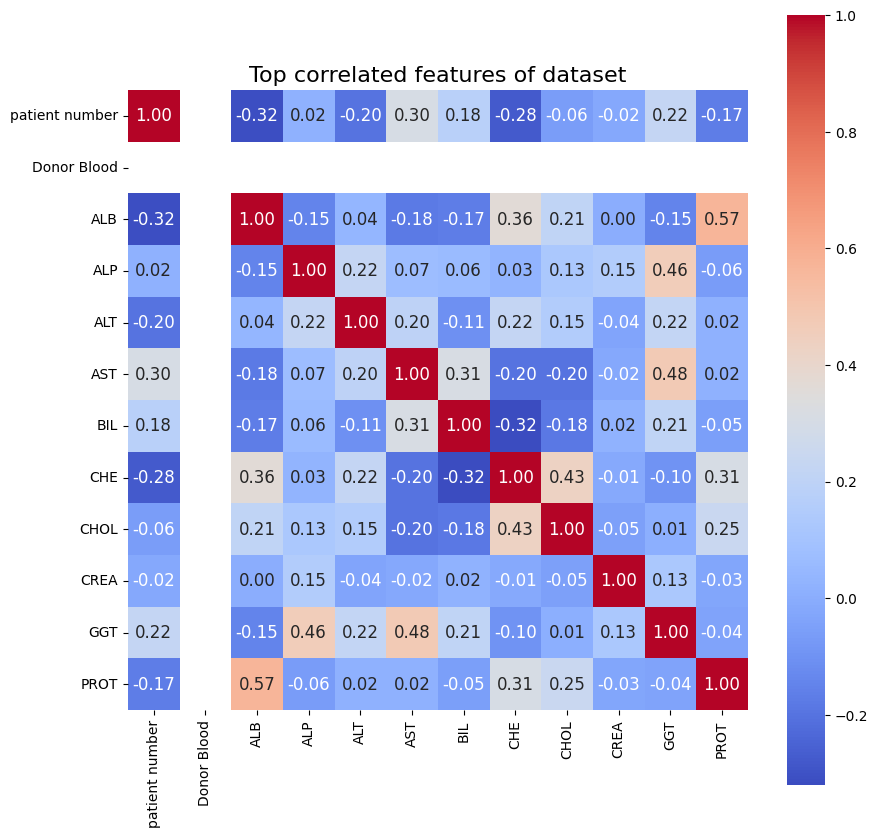

In [54]:
top = 15
corr = VHC.corr()
top15 = corr.nlargest(top, 'Donor Blood')['Donor Blood'].index
corr_top15 = VHC[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()